Code to Plot Losses inline in this notebook

In [1]:
%matplotlib inline

## The Task for the AI



## Prerequisite 

In [2]:
import numpy as np                 # advanced math library
import matplotlib.pyplot as plt    # MATLAB like plotting routines
import random                      # For generating random number
%matplotlib inline


from keras.datasets import mnist      # MNIST dataset is included in keras
from keras.models import Sequential   # Model type to be used

from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

# Loading Training Data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


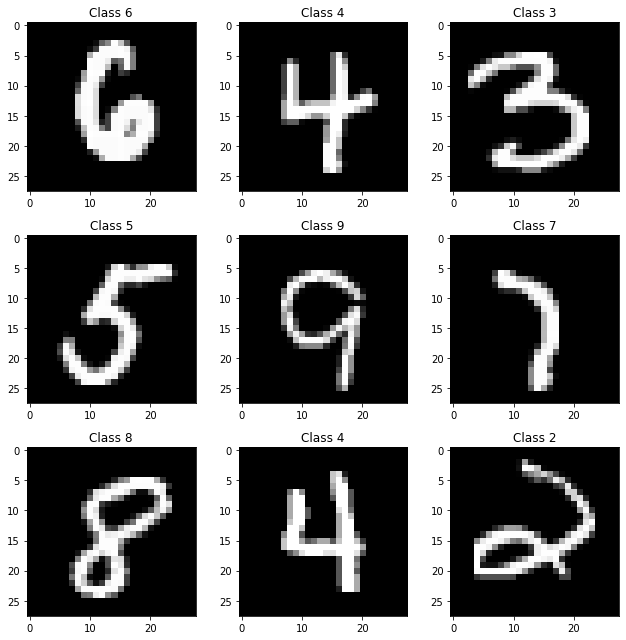

In [4]:
plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
  plt.subplot(3,3,i+1)
  num = random.randint(0,len(X_train))
  plt.imshow(X_train[num], cmap = 'gray', interpolation = 'none')
  plt.title("Class {}".format(y_train[num]))

plt.tight_layout()




In [5]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
# now print!        
matprint(X_train[num])

0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0   12  164   25    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0   18  254  248  189    5    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    2   84  131  166  210  149   71    9    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0   31   87   50  114  240  186   43    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   50   85  237   45    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    8  206  210   42    0    0  0  0  0  0  


In [6]:
X_train = X_train.reshape(60000, 784)   # reshape 60,000 28*28 matrices into
X_test = X_test.reshape(10000, 784)     # reshape 10,000 28*28 matrices into

X_train = X_train.astype('float32')     # #change integers to 32-bit floating point
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255   # normalize each value for each pixel 


In [7]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)      

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


We need to encoding for labels

In [8]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [9]:
# The Sequential model is a linear stack of layers
model = Sequential()

In [10]:
# The first hidden layer is a set of 512 nodes (artifical neurons)
# Each node will recieve an element from each input vector and apply some weight and bias to it
model.add(Dense(512, input_shape = (784,)))

In [11]:
from keras.layers import Activation
# An activation is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The RELU converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged. 
model.add(Activation('relu'))

In [12]:
# Dropout zeros a selection of random outputs.
# Dropout helps protect the model from memorizing or overfitting the training data.
model.add(Dropout(0.2))

In [13]:
# The second hidden layer appears identical to our first layer.
# However instead of each of the 512-node recieving 784-inputs from the input image data, 
# they recieve 512 inputs from the output of the first 512-node layer.
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [14]:
# The final layer of a FCN should be equal to the number of desired classes(10 in this case)
model.add(Dense(10))

In [15]:
# The softmax activation represents a probability dist. over k different possible outcomes.
# Its values are all non-negative and sum to 1.
model.add(Activation('softmax'))

We need to see what are the trainable and non-trainable parameters in the summary:

In [16]:
# Summary of the model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

What are trainable and non- trininable parametersin the summary

## Compiling the model

In [17]:
# let's use the Adam optimizer for learning 
model.compile(loss = 'categorical_crossentropy', optimizer='adam',
              metrics = ['accuracy'])


In [18]:
#fit the model
model.fit(X_train, Y_train,
          batch_size=128, epochs = 10,
          verbose=1)

Epoch 1/10
469/469 [==============================] - 11s 20ms/step - loss: 0.2534 - accuracy: 0.9242
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.1007 - accuracy: 0.9686
Epoch 3/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0715 - accuracy: 0.9775
Epoch 4/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0552 - accuracy: 0.9822
Epoch 5/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0457 - accuracy: 0.9853
Epoch 6/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0371 - accuracy: 0.9880
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0347 - accuracy: 0.9888
Epoch 8/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0324 - accuracy: 0.9891
Epoch 9/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0262 - accuracy: 0.9913
Epoch 10/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0269 - accur

In [19]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 4ms/step - loss: 0.0679 - accuracy: 0.9824
Test score: 0.06793368607759476
Test accuracy: 0.9824000000953674


In [20]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example
predicted_x = model.predict(X_test)
predicted_classes = np.argmax(predicted_x, axis = 1)
# Check which items we got right/wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 1s 4ms/step


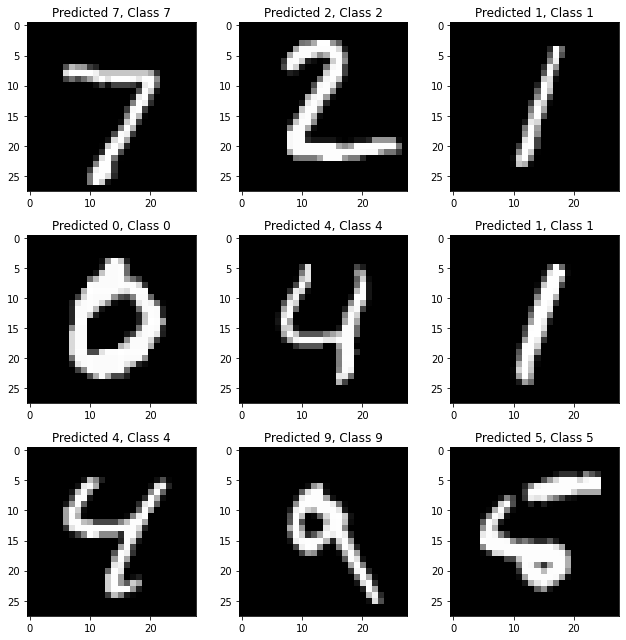

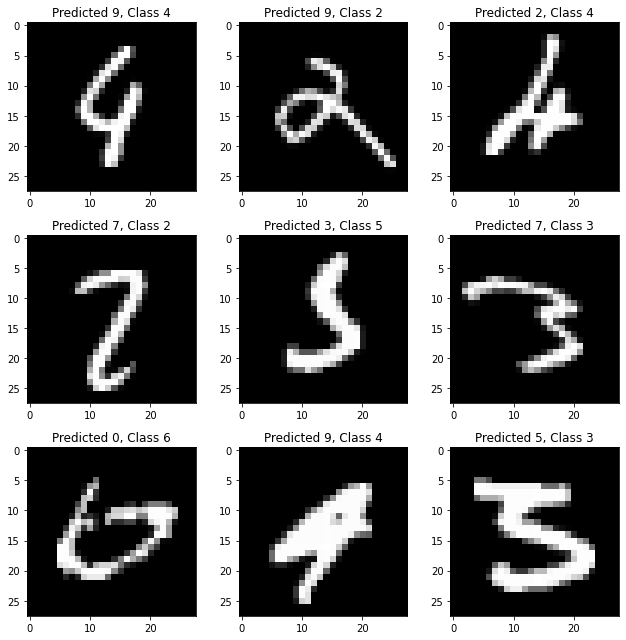

In [21]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

Building a "Deep" Convolutional Neural Network

In [22]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D,Flatten
from keras.layers.normalization.batch_normalization import BatchNormalization

In [23]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [24]:
X_train = X_train.reshape(60000, 28,28,1)   # reshape 60,000 28*28 matrices into
X_test = X_test.reshape(10000, 28,28,1)     # reshape 10,000 28*28 matrices into

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255   # normalize each value for each pixel 

In [25]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [26]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [27]:
model = Sequential()

In [28]:
#Convolution Layer 1
model.add(Conv2D(32,(3,3), input_shape=(28,28,1)))


In [29]:
model.add(BatchNormalization(axis=-1))

In [30]:
convLayer01 = Activation('relu')

In [31]:
model.add(convLayer01)

In [32]:
# Convultional Layer 2
model.add(Conv2D(32,(3,3)))



In [33]:
model.add(BatchNormalization(axis = -1))

In [34]:
model.add(Activation('relu'))

In [35]:
convLayer02 = MaxPooling2D(pool_size=(2,2))

In [36]:
model.add(convLayer02)

In [37]:
from keras.backend import conv2d
# Convolution Layer 3
model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization(axis = -1))
convLayer03 = Activation('relu')
model.add(convLayer03)


In [38]:
# Convolution Layer 4

model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization(axis = -1))
convLayer03 = Activation('relu')
convLayer04 = MaxPooling2D(pool_size=(2,2))
model.add(convLayer04)
model.add(Flatten())

In [39]:
# Fully connected Layer 5
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))

In [40]:
# Fully Connected Layer 6
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 activation_3 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 24, 24, 32)       

In [42]:
model.compile(loss='categorical_crossentropy', 
              optimizer = 'adam', metrics = ['accuracy'])

In [43]:
# data augmentation prevents overfitting by slightly changing the data randomly
# Keras has a great built-in feature to do automatic augmentation
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08,
                         shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

In [44]:
train_generator = gen.flow(X_train,Y_train,batch_size = 128)
test_generator = test_gen.flow(X_test, Y_test, batch_size = 128)

In [45]:
model.fit_generator(train_generator, steps_per_epoch=60000//128,epochs=5, verbose = 1,
                    validation_data = test_generator, validation_steps = 10000//128)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


468/468 [==============================] - 192s 409ms/step - loss: 0.1341 - accuracy: 0.9589 - val_loss: 0.1167 - val_accuracy: 0.9629
Epoch 2/5
468/468 [==============================] - 191s 407ms/step - loss: 0.0534 - accuracy: 0.9834 - val_loss: 0.0498 - val_accuracy: 0.9843
Epoch 3/5
468/468 [==============================] - 192s 411ms/step - loss: 0.0421 - accuracy: 0.9870 - val_loss: 0.0318 - val_accuracy: 0.9901
Epoch 4/5
468/468 [==============================] - 191s 409ms/step - loss: 0.0358 - accuracy: 0.9890 - val_loss: 0.0424 - val_accuracy: 0.9867
Epoch 5/5
468/468 [==============================] - 191s 407ms/step - loss: 0.0312 - accuracy: 0.9903 - val_loss: 0.0279 - val_accuracy: 0.9906


In [46]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 10s 33ms/step - loss: 0.0279 - accuracy: 0.9906
Test score: 0.027895567938685417
Test accuracy: 0.9905999898910522
